In [1]:
import pandas as pd
import numpy as np
import string
import re
import matplotlib.pyplot as plt
from collections import Counter
import yellowbrick

In [2]:
df_tumor = pd.read_csv('data.csv')
df_tumor.head().transpose()

,0,1,2,3,4
id,842302,842517,84300903,84348301,84358402
diagnosis,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29
texture_mean,10.38,17.77,21.25,20.38,14.34
perimeter_mean,122.8,132.9,130,77.58,135.1
area_mean,1001,1326,1203,386.1,1297
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043


In [3]:
#what type of variables are in the table 
print("Describe Data")
print(df_tumor.describe())
print("Summarized Data")
print(df_tumor.describe(include=['O']))

Describe Data
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064         

In [4]:
# set up the figure size
plt.rcParams['figure.figsize'] = (20, 25)

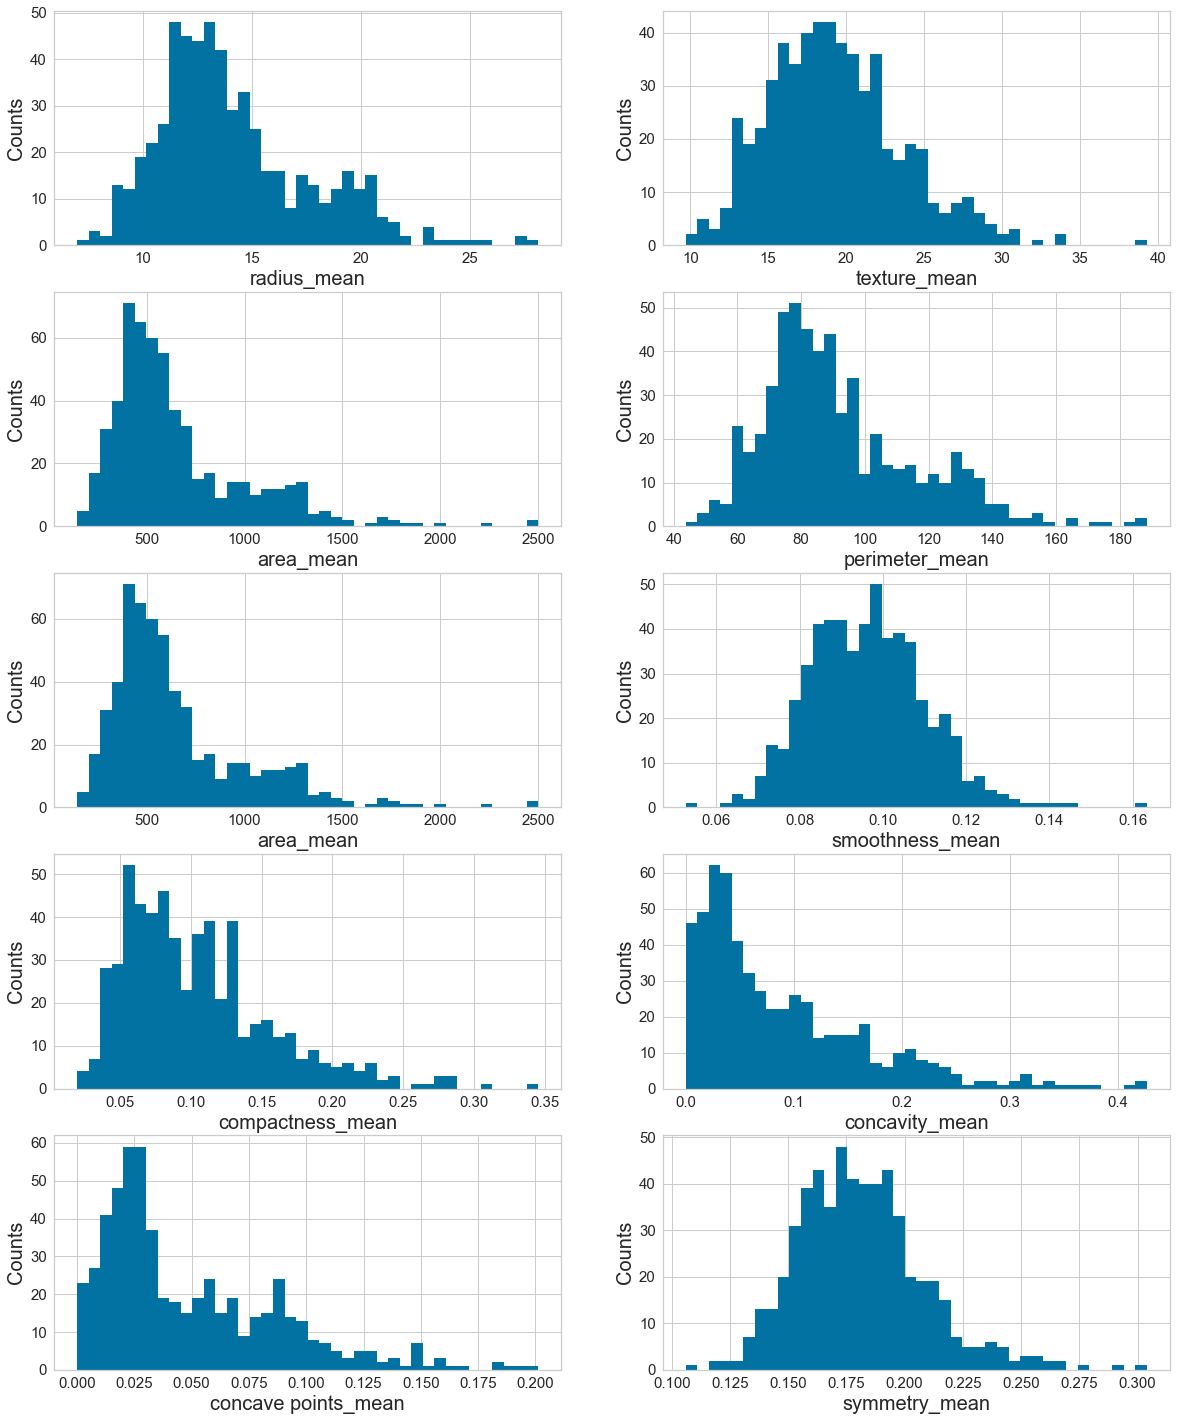

In [5]:
# make subplots of the means
fig, axes = plt.subplots(nrows = 5, ncols = 2)

# Specify the features of interest
num_features = ['radius_mean', 'texture_mean', 'area_mean','perimeter_mean','area_mean', 
                'smoothness_mean', 'compactness_mean','concavity_mean', 'concave points_mean', 'symmetry_mean']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts','Counts', 'Counts', 'Counts', 'Counts','Counts', 'Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df_tumor[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

In [6]:
# set up the figure size
plt.rcParams['figure.figsize'] = (20, 25)

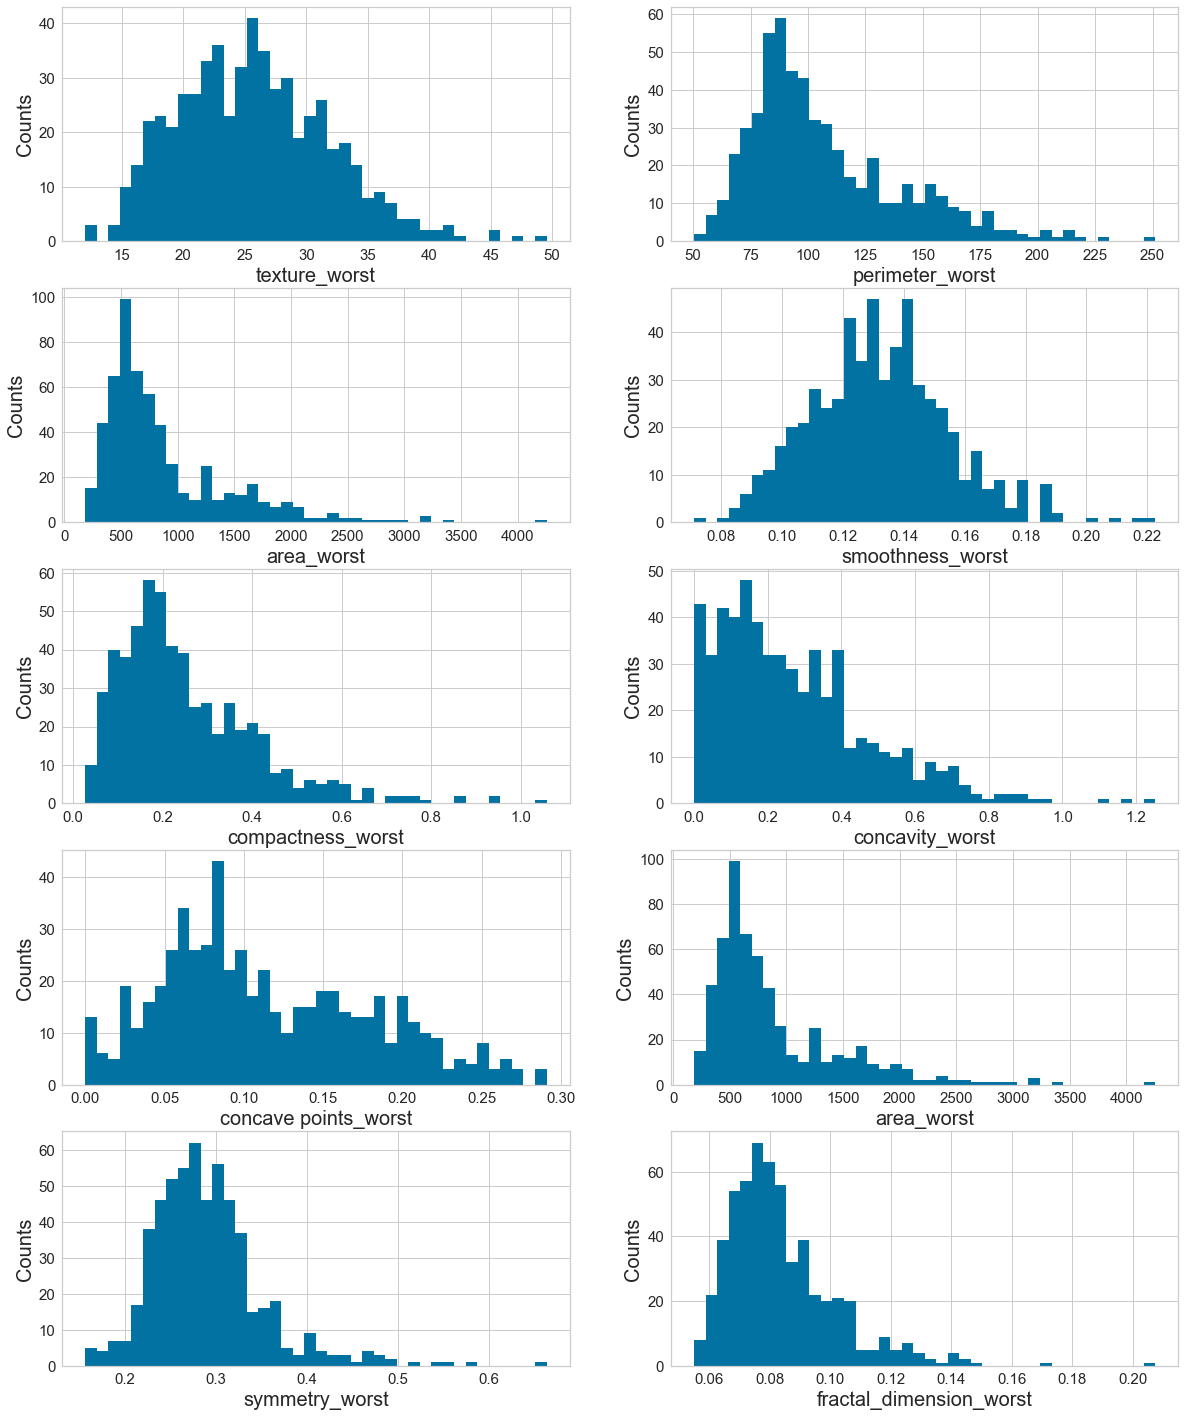

In [7]:
# make subplots of the means
fig, axes = plt.subplots(nrows = 5, ncols = 2)

# Specify the features of interest
num_features = ['texture_worst','perimeter_worst','area_worst', 'smoothness_worst','compactness_worst','concavity_worst', 
                'concave points_worst','area_worst','symmetry_worst','fractal_dimension_worst']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts','Counts','Counts', 'Counts', 'Counts','Counts','Counts']

# draw histograms
axes = axes.ravel()

for idx, ax in enumerate(axes):
    ax.hist(df_tumor[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

In [8]:
num_features = ['radius_mean', 'texture_mean', 'area_mean','perimeter_mean','smoothness_mean', 'compactness_mean',
                'concavity_mean', 'concave points_mean', 'symmetry_mean']

<AxesSubplot:title={'center':'Pearson Ranking of 9 Features'}>

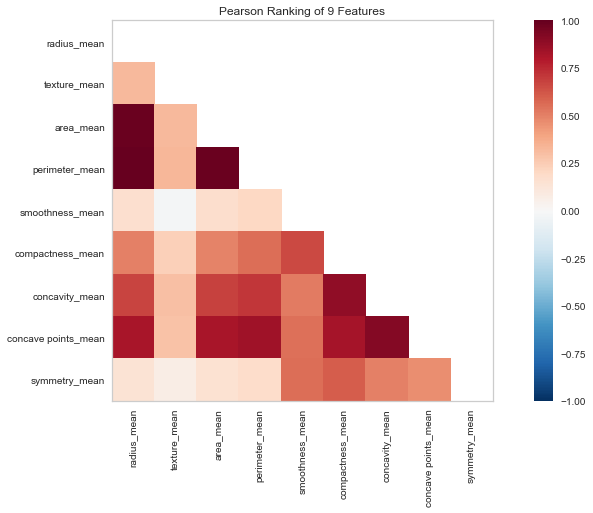

In [9]:
#Correlation Graph for mean measurements
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = df_tumor[num_features].to_numpy()

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="pcoords1.png") # Draw/show/poof the dat=-oi

In [10]:
num_features = ['texture_worst','perimeter_worst','area_worst', 'smoothness_worst','compactness_worst','concavity_worst', 
                'concave points_worst','symmetry_worst','fractal_dimension_worst']

<AxesSubplot:title={'center':'Pearson Ranking of 9 Features'}>

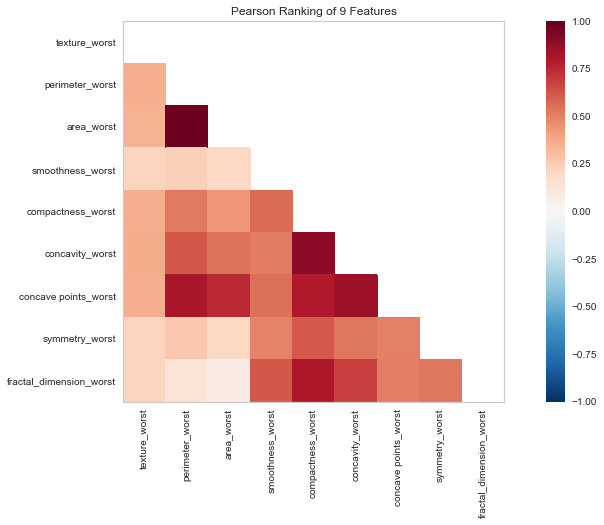

In [12]:
#Correlation for worst features
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = df_tumor[num_features].to_numpy()

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="pcoords1.png") # Draw/show/poof the dat=-oi

In [13]:
num_features = ['radius_mean', 'texture_mean', 'area_mean','perimeter_mean','smoothness_mean', 'compactness_mean',
                'concavity_mean', 'concave points_mean', 'symmetry_mean','texture_worst','perimeter_worst','area_worst', 'smoothness_worst','compactness_worst','concavity_worst', 
                'concave points_worst','symmetry_worst','fractal_dimension_worst']

<AxesSubplot:title={'center':'Pearson Ranking of 18 Features'}>

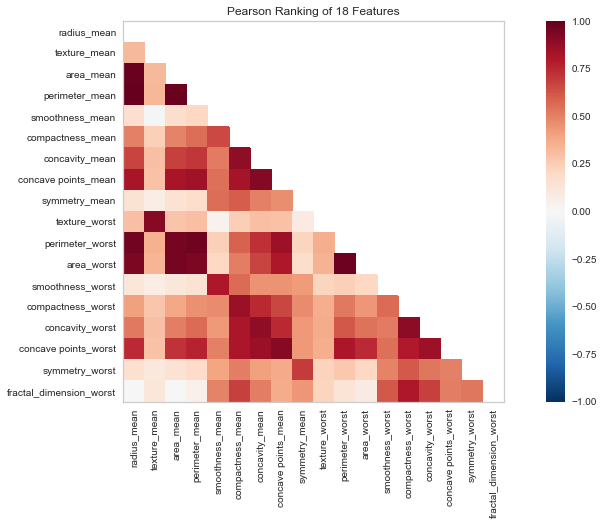

In [14]:
#Correlation for all features
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = df_tumor[num_features].to_numpy()

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="pcoords1.png") # Draw/show/poof the dat=-oi

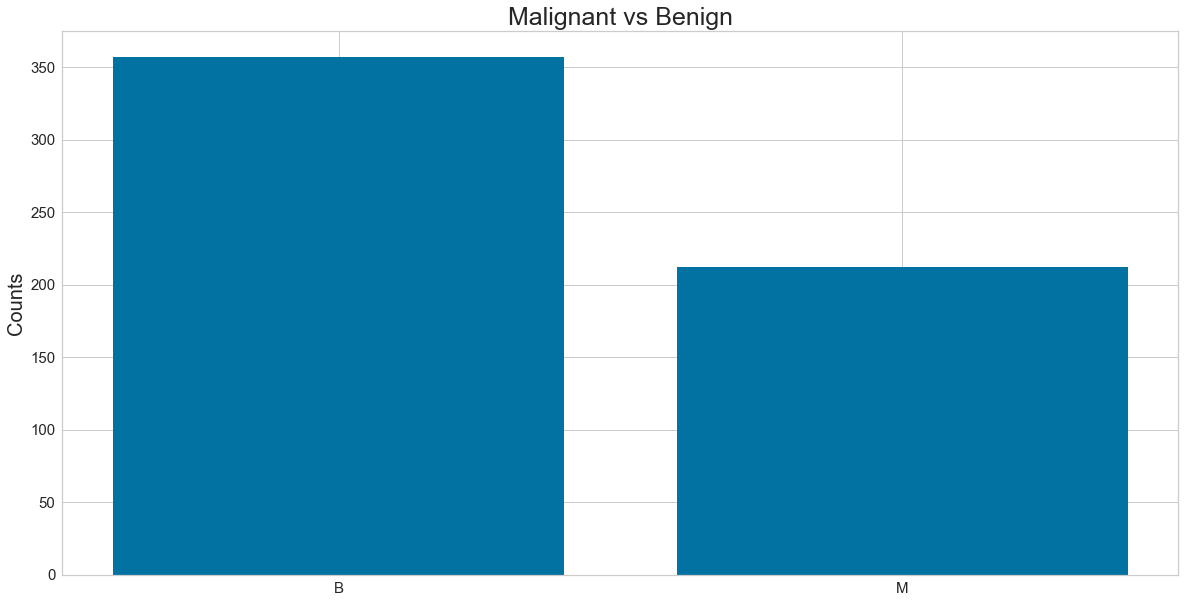

In [15]:
#7:  Barcharts: set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 1, ncols = 1)

# make the data read to feed into the visualizer
X_TumorSize = df_tumor.replace({'diagnosis': {1: 'yes', 0: 'no'}}).groupby('diagnosis').size().reset_index(name='Counts')['diagnosis']
Y_TumorSize = df_tumor.replace({'diagnosis': {1: 'yes', 0: 'no'}}).groupby('diagnosis').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes.bar(X_TumorSize, Y_TumorSize)
axes.set_title('Malignant vs Benign', fontsize=25)
axes.set_ylabel('Counts', fontsize=20)
axes.tick_params(axis='both', labelsize=15)

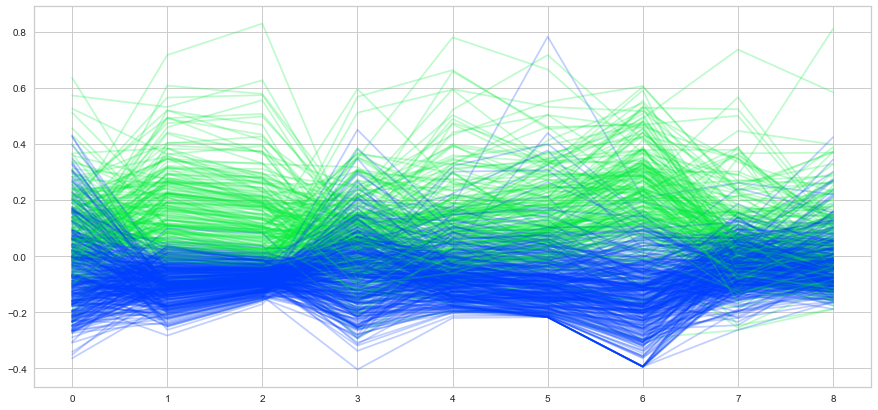

In [16]:
# Step 9:  Compare mean size variables against Malignant and Benign
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

# setup the color for yellowbrick visulizer
from yellowbrick.style import set_palette
set_palette('sns_bright')

# import packages
from yellowbrick.features import ParallelCoordinates
# Specify the features of interest and the classes of the target
classes = ['Not-Malignant', 'Malignant']
num_features = ['texture_worst','perimeter_worst','area_worst', 'smoothness_worst','compactness_worst','concavity_worst', 
                'concave points_worst','symmetry_worst','fractal_dimension_worst']

# copy data to a new dataframe
data_norm = df_tumor.copy()
# normalize data to 0-1 range
for feature in num_features:
    data_norm[feature] = (df_tumor[feature] - df_tumor[feature].mean(skipna=True)) / (df_tumor[feature].max(skipna=True) - df_tumor[feature].min(skipna=True))

# Extract the numpy arrays from the data frame
X = data_norm[num_features].to_numpy()
y = df_tumor.diagnosis.to_numpy()

# Instantiate the visualizer
# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=num_features)


visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
#visualizer.poof(outpath="d://pcoords2.png") # Draw/show/poof the data
plt.show();

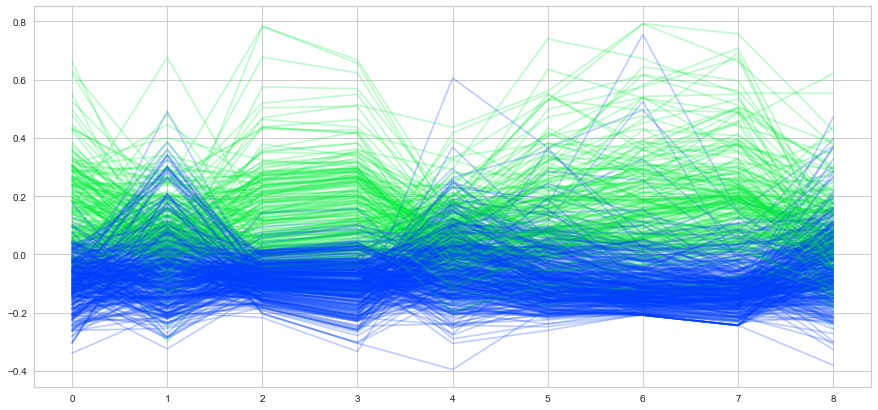

In [17]:
#Compare variables against Malignant and Benign for worst size features
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

# setup the color for yellowbrick visulizer
from yellowbrick.style import set_palette
set_palette('sns_bright')

# import packages
from yellowbrick.features import ParallelCoordinates
# Specify the features of interest and the classes of the target
classes = ['Not-Malignant', 'Malignant']
num_features = ['radius_mean', 'texture_mean', 'area_mean','perimeter_mean','smoothness_mean', 'compactness_mean',
                'concavity_mean', 'concave points_mean', 'symmetry_mean']

# copy data to a new dataframe
data_norm = df_tumor.copy()
# normalize data to 0-1 range
for feature in num_features:
    data_norm[feature] = (df_tumor[feature] - df_tumor[feature].mean(skipna=True)) / (df_tumor[feature].max(skipna=True) - df_tumor[feature].min(skipna=True))

# Extract the numpy arrays from the data frame
X = data_norm[num_features].to_numpy()
y = df_tumor.diagnosis.to_numpy()

# Instantiate the visualizer
# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=num_features)


visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
#visualizer.poof(outpath="d://pcoords2.png") # Draw/show/poof the data
plt.show();

In [18]:
# fill in missing values and eliminate features

# fill with the most represented value
def fill_na_most(data, inplace=True):
    return data.fillna('S', inplace=inplace)


fill_na_most(df_tumor['radius_mean'])
fill_na_most(df_tumor['texture_mean'])
fill_na_most(df_tumor['area_mean'])
fill_na_most(df_tumor['perimeter_mean'])
fill_na_most(df_tumor['smoothness_mean'])
fill_na_most(df_tumor['compactness_mean'])
fill_na_most(df_tumor['concavity_mean'])
fill_na_most(df_tumor['concave points_mean'])
fill_na_most(df_tumor['symmetry_mean'])
fill_na_most(df_tumor['texture_worst'])
fill_na_most(df_tumor['perimeter_worst'])
fill_na_most(df_tumor['area_worst'])
fill_na_most(df_tumor['concave points_mean'])
fill_na_most(df_tumor['symmetry_worst'])
fill_na_most(df_tumor['fractal_dimension_worst'])

#what type of variables are in the table 

print("Summarized Data")
print(df_tumor.describe(include=['O']))

Summarized Data
       diagnosis
count        569
unique         2
top            B
freq         357


In [19]:
#- convert categorical data to numbers
#get the categorical data
df_cat = df_tumor.replace({'diagnosis': {'B': 0, 'M': 1}})
df_cat.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [20]:
#load libraries
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

In [21]:
#Lasso Regression to reduce features

# Create features 
features = df_cat[['radius_mean','texture_mean','area_mean','perimeter_mean','smoothness_mean','compactness_mean',
                     'concavity_mean','concave points_mean','symmetry_mean','texture_worst','perimeter_worst',
                     'area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst',
                     'symmetry_worst','fractal_dimension_worst']]

# Create target
target = df_cat['diagnosis']

#Display original data
print("Features:  ", features[0:5])
print ("Target:  ", target)

Features:      radius_mean  texture_mean  area_mean  perimeter_mean  smoothness_mean  \
0        17.99         10.38     1001.0          122.80          0.11840   
1        20.57         17.77     1326.0          132.90          0.08474   
2        19.69         21.25     1203.0          130.00          0.10960   
3        11.42         20.38      386.1           77.58          0.14250   
4        20.29         14.34     1297.0          135.10          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0          17

In [22]:
#Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

In [23]:
#Create lasso regression with alpha value
regression = Lasso(alpha=0.5)

In [24]:
#Fit the linear regression
model = regression.fit(features_standardized, target)
print(model)

Lasso(alpha=0.5)


In [25]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 0.37258347978910367
slope: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Using PCA

In [26]:
#load libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [27]:
#Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

Create a PCA that will retain 99% of variance

In [28]:
pca = PCA(n_components = 0.99,whiten=True)

In [29]:
#conduct PCA
features_pca = pca.fit_transform(features)

In [30]:
# Show results 
print("Original number of features", features.shape[1])
print("Reduced number of features", features_pca.shape[1])

Original number of features 18
Reduced number of features 2


In [31]:
print(features_pca)

[[ 1.73742777 -3.44204588]
 [ 1.90821286  0.18618313]
 [ 1.49495098  0.45824017]
 ...
 [ 0.47287987  0.55707321]
 [ 1.68993421  0.40078803]
 [-1.15997158 -1.03884258]]


In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [33]:
lda =  LinearDiscriminantAnalysis(n_components=1)

In [34]:
features_lda = lda.fit(features, target).transform(features)

In [35]:
# Show results 
print("Original number of features", features.shape[1])
print("Reduced number of features", features_pca.shape[1])

Original number of features 18
Reduced number of features 2


 Based on the correlation charts it looks like the following ten features can be used. After doing a PCA and LDA analysis it looks like the features can be reduced down to 2, I will run a regression on this but I think that to make a proper analysis without underfitting the model I will go with the non correlated variables using the graph analysis. Below are the variables I will keep. The next step will be to find if the full model can outperform the reduced models or one of these models can be used for making predictions. below are the features I will keep for the rest of the analysis.
 texture_mean
 perimeter_mean
 smoothness_mean
 compactness_mean
 symmetry_se
 radius_worst
 texture_worst
 area_worst
smoothness_worst
compactness_wors

# Build and Evaluate a Model

We want to find the minimum number of features to detect a Malignant Tumor Based The measurements 
of a tumor detected in a female's breast. We will build and evaluate some models to determine how well it 
fits and how successful it is

The first step will be to read in the model and rename diagnosis to target. We can then verify that there is a somewhat good representation of malignant "M" and benign "B" tumors in the data. The we can use the 10 features selected by the feature selection and build a logistic regression model. Then the data will be scaled so that it is standardized when we run the model. We then split the data into training data and test data so we don't use the same data to predict the outcome and reduces overfitting the model. We can then build the model and run the confusion matrix to see what kind of predictions the model makes. We can also plot the ROC curve to see at what point the model reaches error free or somewhat close to it. 

In [4]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

In [5]:
# Change diagnosis name to target the better represent the outcome of the model data
df_tumor = df_tumor.rename(columns={'diagnosis': 'target'})
#Check to see what the balance is between Benign and Malignant tumor diagnosis.
df_tumor['target'].value_counts(dropna=False)

B    357
M    212
Name: target, dtype: int64

In [6]:
# Use the features selected during feature seelction and convert the target column to binary 0s and 1s
features = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_se',
                'radius_worst','texture_worst','area_worst','smoothness_worst','compactness_worst']
df_new = df_tumor[features]
df_cat = df_tumor.replace({'target': {'B': 0, 'M': 1}})
df_temp = df_cat['target']
df_new = pd.concat([df_temp, df_new], axis=1)
print(df_new).transpose()

     target  texture_mean  perimeter_mean  smoothness_mean  compactness_mean  \
0         1         10.38          122.80          0.11840           0.27760   
1         1         17.77          132.90          0.08474           0.07864   
2         1         21.25          130.00          0.10960           0.15990   
3         1         20.38           77.58          0.14250           0.28390   
4         1         14.34          135.10          0.10030           0.13280   
..      ...           ...             ...              ...               ...   
564       1         22.39          142.00          0.11100           0.11590   
565       1         28.25          131.20          0.09780           0.10340   
566       1         28.08          108.30          0.08455           0.10230   
567       1         29.33          140.10          0.11780           0.27700   
568       0         24.54           47.92          0.05263           0.04362   

     symmetry_se  radius_worst  texture

AttributeError: 'NoneType' object has no attribute 'transpose'

In [89]:
#split the data by using 70% of data to train and 30% of data to test and insure the same resentation of malignant to 
#bening ratio between the train and the test data
random_seed = 888
df_train, df_test = train_test_split(df_new, test_size=0.3, random_state=random_seed, stratify=df_new['target'])


print(df_train.shape)
print(df_test.shape)
print()
print(df_train['target'].value_counts(normalize=True))
print()
print(df_test['target'].value_counts(normalize=True))

(398, 11)
(171, 11)

0    0.628141
1    0.371859
Name: target, dtype: float64

0    0.625731
1    0.374269
Name: target, dtype: float64


In [90]:
#scale the data to standardize it for use in the model
scaler = StandardScaler()
scaler.fit(df_train[features])

X = scaler.transform(df_train[features])
y = df_train['target']

print(X.shape)
print(y.shape)

(398, 10)
(398,)


Create Logistic Regression Model

In [91]:
#Create a logistic Regression model and fit the data to it
logistic_regression = LogisticRegression(random_state=0, multi_class="ovr")
model = logistic_regression.fit(X,y)

In [92]:
scaler = StandardScaler()
scaler.fit(df_test[features])

X_test = scaler.transform(df_test[features])
y_test = df_test['target']

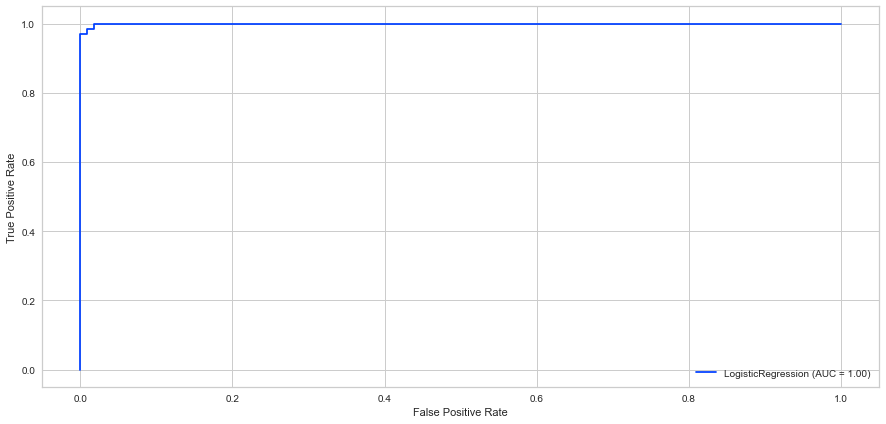

In [94]:
#plot the ROC curve It looks like the elbow is somewhere in the high 0.95 area
plot_roc_curve(model, X_test, y_test)

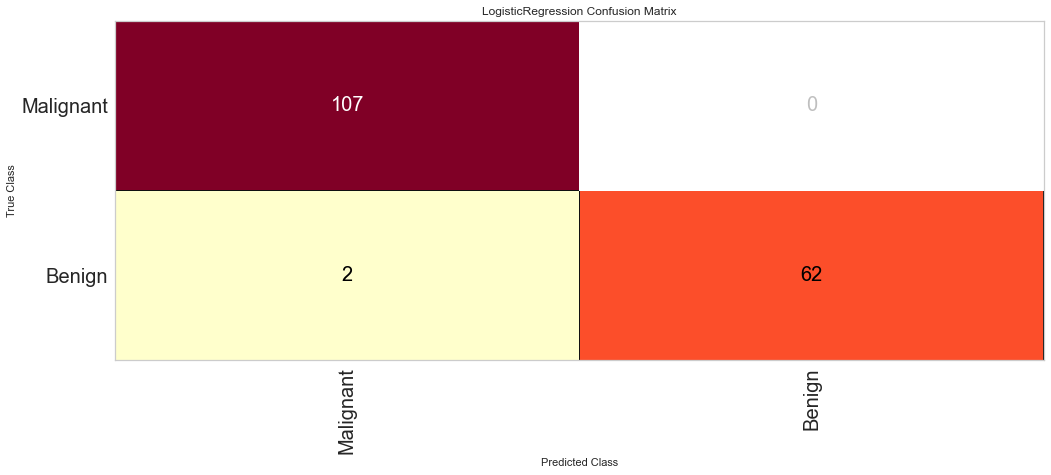

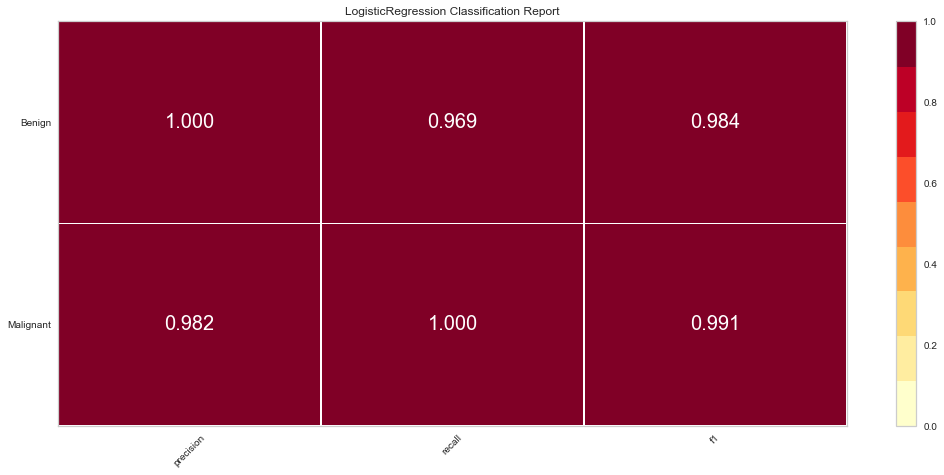

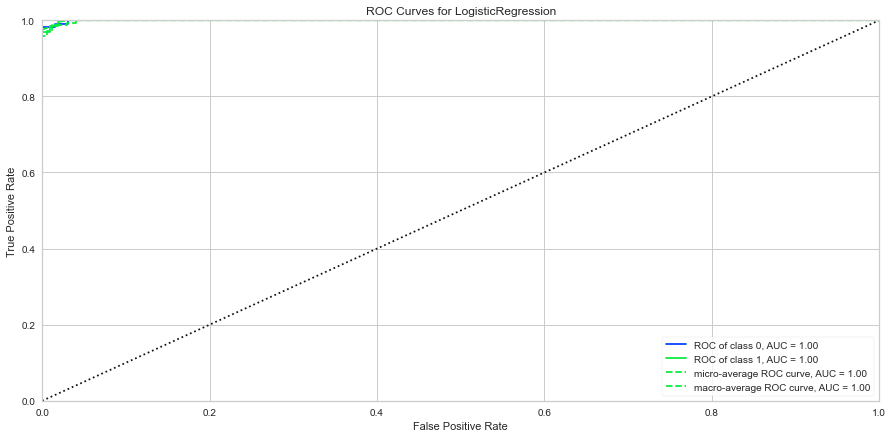

In [95]:
#Plot confusion matrix and classificatio report and ROC curves to 
#evaluate the data

from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

# Instantiate the classification model 
model = LogisticRegression()

#The ConfusionMatrix visualizer taxes a model
classes = ['Malignant','Benign']
cm = ConfusionMatrix(model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X, y)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_test, y_test)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X, y)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model)

visualizer.fit(X, y)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()


In [97]:
#based on the prediction print the Classification Report
test_prob = model.predict_proba(X_test)[:, 1]
test_pred = model.predict(X_test)


print(confusion_matrix(y_test, test_pred))
print('\nClassification Report')
print(classification_report(y_test, test_pred))

[[107   0]
 [  2  62]]

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       107
           1       1.00      0.97      0.98        64

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



The test shows and accuracy over 95% however the model did choose 2 tumors that were bening as malignant.
This could be an issue. The model can be further tested to see if this could be resolved howver predicting a benign
tumor as malignant could be viewed as better than predicting a malignant tumor as benign. Overall the model looks good. I will have to run a model with the PCA feature selection to see if it is as good or better than this model. 

# Let's try fitting a Neural Network Classifier

In [103]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier

# Import necessary modules
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [106]:
df_new

,target,texture_mean,perimeter_mean,smoothness_mean,compactness_mean,symmetry_se,radius_worst,texture_worst,area_worst,smoothness_worst,compactness_worst
0,1,10.38,122.80,0.11840,0.27760,0.03003,25.380,17.33,2019.0,0.16220,0.66560
1,1,17.77,132.90,0.08474,0.07864,0.01389,24.990,23.41,1956.0,0.12380,0.18660
2,1,21.25,130.00,0.10960,0.15990,0.02250,23.570,25.53,1709.0,0.14440,0.42450
3,1,20.38,77.58,0.14250,0.28390,0.05963,14.910,26.50,567.7,0.20980,0.86630
4,1,14.34,135.10,0.10030,0.13280,0.01756,22.540,16.67,1575.0,0.13740,0.20500
...,...,...,...,...,...,...,...,...,...,...,...
564,1,22.39,142.00,0.11100,0.11590,0.01114,25.450,26.40,2027.0,0.14100,0.21130
565,1,28.25,131.20,0.09780,0.10340,0.01898,23.690,38.25,1731.0,0.11660,0.19220
566,1,28.08,108.30,0.08455,0.10230,0.01318,18.980,34.12,1124.0,0.11390,0.30940
567,1,29.33,140.10,0.11780,0.27700,0.02324,25.740,39.42,1821.0,0.16500,0.86810


looking a df_new and its statistics we see that the data needs to be scaled, but this time we will scale 
between 0 and 1 in order to use with a neural network classifier

In [107]:
df_new.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
target,569.0,0.372583,0.483918,0.000000,0.00000,0.00000,1.00000,1.00000
texture_mean,569.0,19.289649,4.301036,9.710000,16.17000,18.84000,21.80000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.17000,86.24000,104.10000,188.50000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.08637,0.09587,0.10530,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.06492,0.09263,0.13040,0.34540
symmetry_se,569.0,0.020542,0.008266,0.007882,0.01516,0.01873,0.02348,0.07895
radius_worst,569.0,16.269190,4.833242,7.930000,13.01000,14.97000,18.79000,36.04000
texture_worst,569.0,25.677223,6.146258,12.020000,21.08000,25.41000,29.72000,49.54000
area_worst,569.0,880.583128,569.356993,185.200000,515.30000,686.50000,1084.00000,4254.00000
smoothness_worst,569.0,0.132369,0.022832,0.071170,0.11660,0.13130,0.14600,0.22260


In [108]:
target_column = ['target'] 
predictors = list(set(list(df_new.columns))-set(target_column))
df_new[predictors] = df_new[predictors]/df_new[predictors].max()
df_new.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
target,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.0
texture_mean,569.0,0.491081,0.109497,0.247200,0.411660,0.479633,0.554990,1.0
perimeter_mean,569.0,0.487899,0.128907,0.232308,0.398780,0.457507,0.552255,1.0
smoothness_mean,569.0,0.589720,0.086072,0.322093,0.528580,0.586720,0.644431,1.0
compactness_mean,569.0,0.302087,0.152903,0.056109,0.187956,0.268182,0.377533,1.0
symmetry_se,569.0,0.260194,0.104704,0.099835,0.192020,0.237239,0.297403,1.0
radius_worst,569.0,0.451420,0.134108,0.220033,0.360988,0.415372,0.521365,1.0
texture_worst,569.0,0.518313,0.124067,0.242632,0.425515,0.512919,0.599919,1.0
area_worst,569.0,0.207001,0.133840,0.043535,0.121133,0.161378,0.254819,1.0
smoothness_worst,569.0,0.594648,0.102572,0.319721,0.523810,0.589847,0.655885,1.0


Now that we have scaled the data we can now split the data into train and test data

In [72]:
X = df_new[predictors].values
y = df_new[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(398, 10)
(171, 10)


In [73]:
# Use MLP neural networkk classifier with 10 x 10 x 10 layers and 1000 max iterations
mlp = MLPClassifier(hidden_layer_sizes=([10,10,10]),activation='relu', solver='adam', max_iter=1000)
mlp.fit(X_train,y_train.ravel())

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [74]:
#Let's look at the confusion matrix for the training data
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[238   4]
 [  4 152]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       242
           1       0.97      0.97      0.97       156

    accuracy                           0.98       398
   macro avg       0.98      0.98      0.98       398
weighted avg       0.98      0.98      0.98       398



Now lets look at the results of the test data

In [75]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[111   4]
 [  2  54]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       115
           1       0.93      0.96      0.95        56

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.97      0.96      0.97       171



Used a Neural Network model to fit the data. The accuracy of the neural network was about the same as the logistic regression. I would probably choose the logistic regression model since it has similart results in the accruacy and it performed a bit better in the identification of cancer is positive and it may better interpret other results as well. I think accuracy of the model is important, however detecting a benign tumor when it is actually cancer could hinder a person form getting treatment sooner rather than later. Since the logistic regression model made better predictions in that area, it is also why I would chose that model, although both models are the same in accuracy. 